# House Price Prediction in King County, USA


The purpose of this project is to clean, analyse and build regression models on the dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


Import required libraries:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format  # round floats to 2dp's

Load the csv:


In [2]:
df=pd.read_csv('kc_house_data.csv')


## Exploring the data



Reading first 5 rows of data:

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.00,3.00,1.00,1180,5650,1.00,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,1,6414100192,20141209T000000,538000.00,3.00,2.25,2570,7242,2.00,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2,5631500400,20150225T000000,180000.00,2.00,1.00,770,10000,1.00,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,3,2487200875,20141209T000000,604000.00,4.00,3.00,1960,5000,1.00,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,4,1954400510,20150218T000000,510000.00,3.00,2.00,1680,8080,1.00,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


<br>
Reading last 5 rows of data:

In [4]:
df.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.00,3.00,2.50,1530,1131,3.00,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,21609,6600060120,20150223T000000,400000.00,4.00,2.50,2310,5813,2.00,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,21610,1523300141,20140623T000000,402101.00,2.00,0.75,1020,1350,2.00,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,21611,291310100,20150116T000000,400000.00,3.00,2.50,1600,2388,2.00,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,21612,1523300157,20141015T000000,325000.00,2.00,0.75,1020,1076,2.00,0,...,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


<br>
Checking data types of columns:


In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<br>
Obtaining descriptive statistics of dataset:

In [6]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,10806.00,4580301520.86,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,6239.28,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,0.00,1000102.00,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,5403.00,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,10806.00,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,16209.00,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,21612.00,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


<br>
Determining shape of the dataset:

In [7]:
df.shape

(21613, 22)

<br>
Determining if any duplicate rows:

In [8]:
df.duplicated().sum()

0

<br>
Identifying columns with missing values and how many:

In [9]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

## Data Cleaning


Dropping columns that are not required:


In [10]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.00,3.00,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,20141209T000000,538000.00,3.00,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,20150225T000000,180000.00,2.00,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,20141209T000000,604000.00,4.00,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,20150218T000000,510000.00,3.00,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


<br>
Highlighting the two coloumns with missing values that I discovered earlier:

In [11]:
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


Number of NaN values for the column bedrooms : 13
Number of NaN values for the column bathrooms : 10


<br>
Replacing the missing values of the column <code>'bedrooms'</code> with the median of the values.


In [12]:
median=df['bedrooms'].median()
df['bedrooms'].replace(np.nan,median, inplace=True)

<br>
Applying same process to <code>'bathrooms'</code> column.


In [13]:
median2=df['bathrooms'].median()
df['bathrooms'].replace(np.nan,median2, inplace=True)

In [14]:
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0


<br>
Removing time from <code>date</code> column:

In [15]:
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,3.00,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,2014-12-09,538000.00,3.00,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2015-02-25,180000.00,2.00,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2014-12-09,604000.00,4.00,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,2015-02-18,510000.00,3.00,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503



## Exploratory Data Analysis


Using method <code>value_counts</code> to count the number of houses with unique floor values and converting to a dataframe:


In [16]:
df["floors"].value_counts().to_frame()

,floors
1.00,10680
2.00,8241
1.50,1910
3.00,613
2.50,161
3.50,8


<br>
Determining distribution of houses with or without a waterfront view:


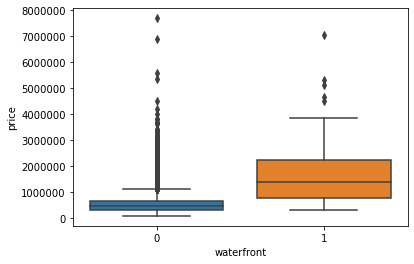

In [17]:
sns.boxplot(x="waterfront", y="price", data=df)

plt.ticklabel_format(style='plain', axis='y') # Converts y axis to numerical values

<br>
Distribution of house prices based on the square foot area of the living space (with simple linear regression): 

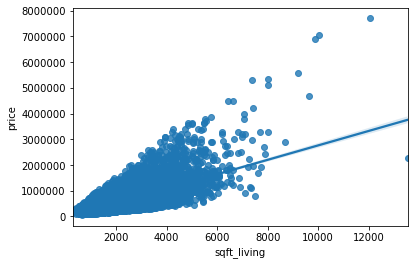

In [18]:
sns.regplot(x="sqft_living", y="price", data=df)

plt.ticklabel_format(style='plain', axis='y')

<br>
Distribution of house prices based on number of bedrooms:

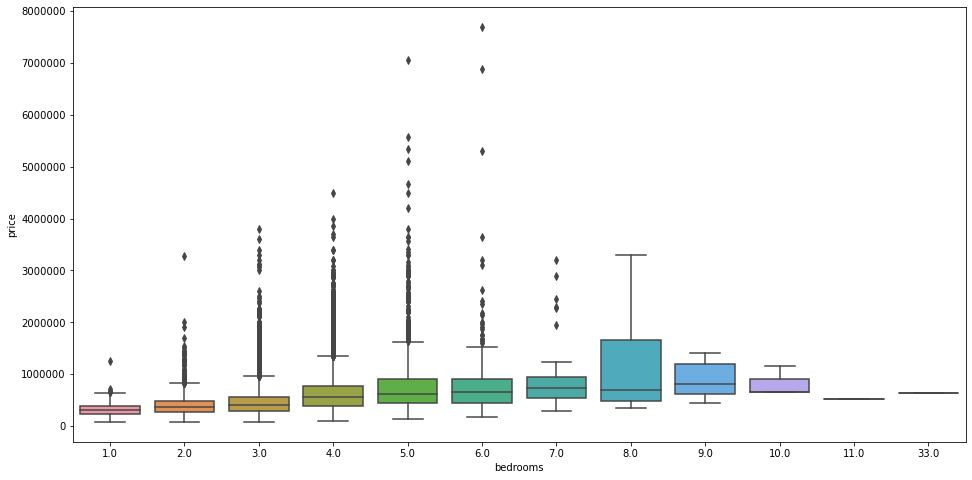

In [19]:
plt.figure(figsize=(16,8))
sns.boxplot(x="bedrooms", y="price", data=df)

plt.ticklabel_format(style='plain', axis='y')

In [20]:
df['bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

<br>
Identifying each independant variable's correlation coefficient with the dependant variable:

In [21]:
df.corr()['price'].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
zipcode         -0.05
Name: price, dtype: float64

# Model Development


Fitting a linear regression model using the  longitude feature <code>'long'</code> and  calculating the R^2:


In [22]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

<br>
Fitting a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> and calculating the R^2:


In [23]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

<br>
Fitting a linear regression model to predict the <code>'price'</code> using a list of features with the highest correlation coefficients:


In [24]:
features = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]] 
lm.fit(features, df["price"])

LinearRegression()

Calculating the R^2:


In [25]:
lm.score(features, df["price"])

0.6577002213435383



### Experimenting with a Pipeline

Creating the input for the pipeline by listing transforms that will standardise and add polynomial terms to the linear regression model. 



In [26]:
Input=[('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

<br>

Creating a pipeline object to predict the <code>'price'</code>, fitting the object using the features in the list <code>features</code>, and calculating the R^2.


In [27]:
pipe = Pipeline(Input)
features = features.astype(float)

pipe.fit(features, df["price"])
pipe.score(features, df["price"])

0.7513406972998302

### Model Evaluation and Refinement


Importing the necessary modules:


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Splitting the data into training and testing sets:


In [29]:
features =["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("Number of test samples:", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples: 3242
Number of training samples: 18371


<br>
Creating and fitting a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculating the R^2 using the test data.


In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
ridge_model.score(x_test, y_test)

0.6478967743507851

<br>
Performing a second order polynomial transform on both the training data and testing data. Creating and fitting a Ridge regression object using the training data, setting the regularisation parameter to 0.1, and calculating the R^2 utilising the test data.


In [32]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])
x_test_pr = pr.fit_transform(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

ridge_model2 = Ridge(alpha=0.1)
ridge_model2.fit(x_train_pr, y_train)
ridge_model2.score(x_test_pr, y_test)

0.7002634379281758